# Problem Statement

The effect of eight input variables (relative compactness, surface area, wall area, roof
area, overall height, orientation, glazing area, glazing area distribution) on two output
variables, namely heating load (HL) and cooling load (CL), of residential buildings is
investigated using a statistical machine learning framework. We have to use a number
of classical and non-parametric statistical analytic tools to carefully analyse the strength
of each input variable's correlation with each of the output variables in order to discover
the most strongly associated input variables. We need to estimate HL and CL, we can
compare a traditional linear regression approach to a sophisticated state-of-the-art
nonlinear non-parametric method, random forests.

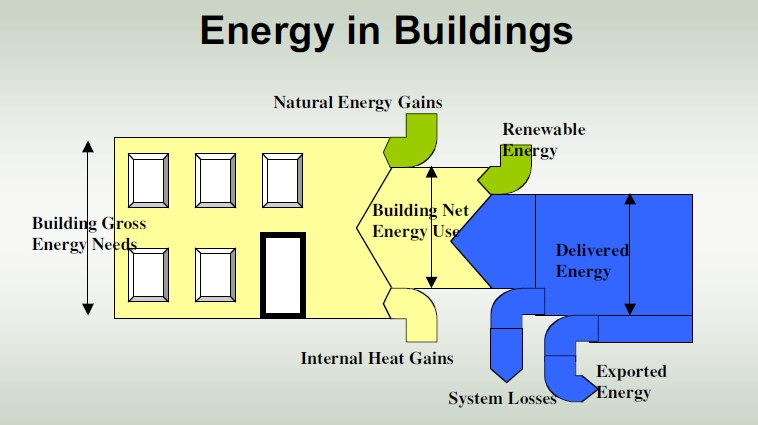

In [11]:
import warnings # Importing necessary libraries
warnings.filterwarnings( "ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_excel('ENB2012_data.xlsx') # Reading Dataset

In [3]:
df.head() # Sample Dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


In [4]:
# Removing useless columns
df1=df.drop(['Unnamed: 10','Unnamed: 11'], axis=1)

In [5]:
# Checking Sample Data set
df1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
# assign name to columns
df1.columns=['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation','Glazing Area','Glazing Area Distribution','Heating Load','Cooling Load']

In [7]:
# After column name sample data
df1.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
# Spliting Independent and Dependent features as X & y
X=df1.drop(['Heating Load','Cooling Load'],axis=1)
y1=df1[['Heating Load']]


In [9]:
# Spliting train and test data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=0.30 , random_state=1)

In [10]:
ss=StandardScaler() 
# we are scaling the data for ANN & KNN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [20]:
annr = MLPRegressor(random_state=123)
rfr = RandomForestRegressor(random_state=123)
svr = SVR()
knn = KNeighborsRegressor()
ada = AdaBoostRegressor(random_state=123)
gbm = GradientBoostingRegressor(random_state=123)
xgb = XGBRegressor(random_state=123)
lr = LinearRegression()


models=[svr,knn,ada,gbm,xgb,rfr,annr,lr]

mape_train=[]
mape_test=[]
scores_train=[]
scores_test=[]


for i in models: 
    
    if (i != annr and i != knn) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        mape_train.append(mean_absolute_percentage_error(y_train,i.predict(x_train)))
        mape_test.append(mean_absolute_percentage_error(y_test,i.predict(x_test)))
        
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        mape_train.append(mean_absolute_percentage_error(y_train,i.predict(x_train)))
        mape_test.append(mean_absolute_percentage_error(y_test,i.predict(x_test)))

        
print(pd.DataFrame({'Train MAPE': mape_train,'Test MAPE': mape_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['SVR','KNN','ADA Boost','GBM',"XG Boost",'Random Forest Regressor', 'ANN Regressor', 'Linear Regression']))

                         Train MAPE   Test MAPE  Training Score  Test Score
SVR                        0.199348    0.187314        0.703616    0.648730
KNN                        0.357194    0.361270        0.965573    0.923431
ADA Boost                  0.076587    0.075620        0.970480    0.965338
GBM                        0.012907    0.016739        0.998353    0.997355
XG Boost                   0.001476    0.009855        0.999986    0.999087
Random Forest Regressor    0.005642    0.015890        0.999600    0.997217
ANN Regressor            132.955142  122.482506        0.827127    0.754617
Linear Regression          0.094216    0.103974        0.925269    0.893855


1. Ensemble based models along with KNN are performing well.
2. ANN is overfitting, also giving absurd result on MAPE.
3. Linear Regression accuracy is lower because of features have high multicollinearity.

In [31]:
HL_Models=(pd.DataFrame({'Train MAPE': mape_train,'Test MAPE': mape_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['SVR','KNN','ADA Boost','GBM',"XG Boost",'Random Forest', 'ANN Regressor', 'Linear Regression']))

In [ ]:
HL_Models=HL_Models[HL_Models.index != 'ANN Regressor'] # Removing ANN score for visualization

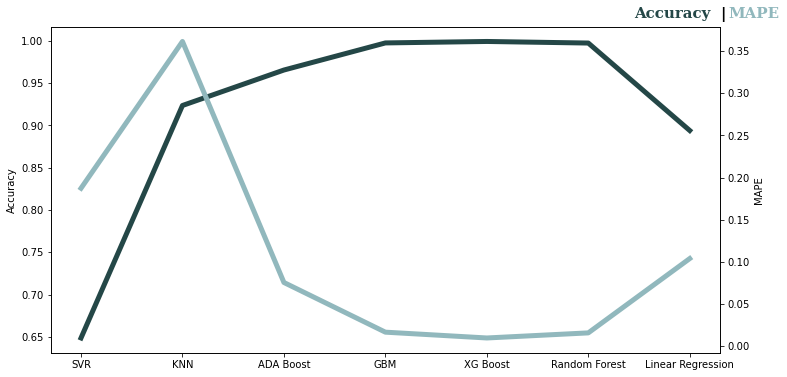

In [33]:
fig, ax1 = plt.subplots(figsize=(12, 6))
fig.text(.8, 0.9, 'Accuracy', fontweight="bold", fontfamily='serif', fontsize=15, color='#244747')
fig.text(.90, 0.9, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(.91,0.9, 'MAPE', fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')

ax1.plot(HL_Models.index, HL_Models['Test Score'], '-', color='#244747', linewidth=5)
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.plot(HL_Models.index, HL_Models['Test MAPE'], '-', color='#91b8bd', linewidth=5)
ax2.set_ylabel('MAPE')

plt.xlabel('Models')
plt.show()

Here we can say that, for predicting Heating Load, XG Boost is best performing algorithm, which is giving best accuracy along with lowest error.

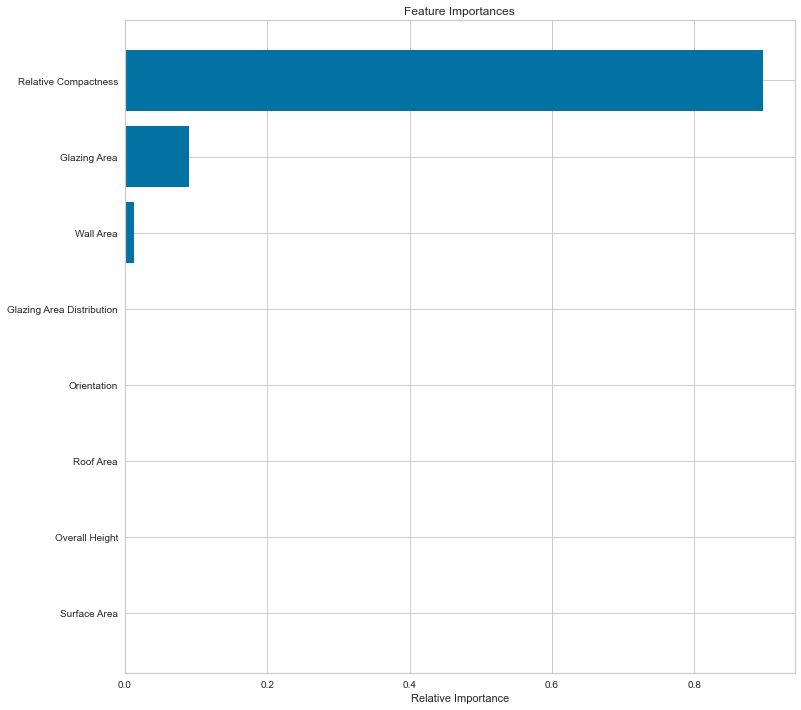

In [22]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

1. XG Boost suggesting Relative Compactness is important feature to predict Cooling Load and alos in the EDA we have seen, Relative Compactness has relationship with various features.